<a href="https://colab.research.google.com/github/frnunez/MS-Portfolio-Syracuse-University/blob/master/IST%20707%20-%20Data%20Analytics%20-%20Classification%20of%20ASD%20Screening%20Data/IST_707_Data_Analytics_Classification_of_ASD_Screening_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Francisco Nunez-Fondeur
# Description: IST 707 - Syracuse University
# Date: 05/16/2019 - Final Project - Autism AQ-10

# CLASSIFICATION OF AUTISTIC SPECTRUM DISORDER SCREENING DATA
<br>
Autism Spectrum Disorder refers to a range of conditions characterized by challenges with social skills, repetitive behaviors, speech and non-verbal communication According to the Centers for Disease Control, autism affects an estimated 1 in 59 children in the United States. In 2013 the American Psychiatric Association merged four distinct diagnoses into one under the name of Autism Spectrum Disorder, there were previously referred to as autistic disorder, childhood disintegrate disorder, pervasive development disorder-not otherwise specified (PDD-NOS) and Asperger syndrome.
For a long time, ASD was associated with a lengthy process to get properly diagnosed. With an increase in the number of ASD cases around the world, a faster screening tool was created called the Autism Spectrum Quotient (AQ) consisting of 50 questions. A condensed version the AQ-10 was created as a faster self-diagnosis tool to determine an individual’s position on the autism-normality spectrum. While the AQ-10 is NOT used for a definitive diagnosis, a score greater that 6/10 would be a flag that you should seek a professional diagnosis.
<br>
<br>
<u>Objective</u>
<br>
While the tool is a great first step, there aren’t many available datasets associated with clinical screenings and behavior. Per Fadi Fayez Thabtah, creator of the set, most available datasets on autism are genetic in nature. The set consists of the responses to behavior questions on the AQ-10 tool along with the results. In addition, 10 individual characteristics were made part of this set which have been used by the behavioral sciences experts for ASD detection. I intend to also use classification to determine the effectiveness of not just the AQ-10 tool but also the individual traits provided in diagnosing ASD by using classification and clustering algorithms. I will be using decision trees, Naïve Bayes, k-NN and Support Vector Machines.
<br>
<br>

## Import Libraries & Data
Lets import the R packages we will be using

In [0]:
#----- Installs ----#

#Install c50
if (!require(C50)) install.packages('C50')

#Install caret
if (!require(caret)) install.packages('caret')

#countrycode
if (!require(countrycode)) install.packages('countrycode')

#Install class
if (!require(class)) install.packages('class')  

#Install dplyr
if (!require(dplyr)) install.packages('dplyr')

#Install e1071
if (!require(e1071)) install.packages('e1071')

#farff
if (!require(farff)) install.packages('farff')

#gmodels
if (!require(gmodels)) install.packages('gmodels')

#Install kernlab
if (!require(kernlab)) install.packages('kernlab')

#Install RWeka
if (!require(RWeka)) install.packages('RWeka')

#SQLDF
if (!require(sqldf)) install.packages('sqldf')

Loading required package: C50

Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: countrycode

Loading required package: class

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: e1071

Loading required package: farff

Loading required package: gmodels

Loading required package: kernlab


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


Loading required package: RWeka

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘RWeka’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Warning mess

Next I downloaded and imported the data. The data consists of three separate data sets available from the UCI Machine Learning Repository. The sets are divided by age; children (4-11), adolescents, (12-17) and adult (18 and over). The number of observations for each of the sets were 292 (children), 104 (adolescents), and 704 (adults) combining for 1100 total observations.  The attributes were: ASD Diagnosis (our classifier), age (in years), gender, ethnicity, born with jaundice (Y/N), Family member with ASD (Y/N), Relation of the person completing the test, Country of Residence, Use of a screening application previously, age description, Questions 1-10 of the AQ tool (each separate), and the Screening Score on the AQ-10. The set was distributed as an arff file.

In [0]:
# Child Set
# Set url link for the location of the dataset
      childURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00419/Autism-Screening-Child-Data%20Plus%20Description.zip"
      
      # Download the .zip file and unzip contents
      download.file(childURL, dest = "child.zip", mode = "wb") 
      unzip("child.zip", exdir = "child")
      
      # Assess the files contained in the .zip file and then import each dataset
      list.files("child")
      Autism_Child_Data <- readARFF("child/Autism-Child-Data.arff")
      #Autism_Child_Data <- readARFF(unz("child.zip", "Autism-Child-Data.arff"))
     # hubway_trips <- read.csv(unz("child.zip", "hubway_trips.csv"))
      
      #Basic Descriptive Info
      Autism_Child_Data[1:5, 1:10]
      str(Autism_Child_Data)
      dim(Autism_Child_Data)

[1] "Autism-Child-Data.arff"                      
[2] "Autism-Screening-Child-Data Description.docx"

Parse with reader=readr : child/Autism-Child-Data.arff

Loading required package: readr

header: 0.030000; preproc: 0.000000; data: 0.033000; postproc: 0.003000; total: 0.066000



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,0,0,1,1,0,1,0,0
2,1,1,0,0,1,1,0,1,0,0
3,1,1,0,0,0,1,1,1,0,0
4,0,1,0,0,1,1,0,0,0,1
5,1,1,1,1,1,1,1,1,1,1


'data.frame':	292 obs. of  21 variables:
 $ A1_Score       : Factor w/ 2 levels "0","1": 2 2 2 1 2 1 2 2 2 1 ...
 $ A2_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 2 2 1 ...
 $ A3_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 2 2 2 2 ...
 $ A4_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 2 2 2 ...
 $ A5_Score       : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 2 ...
 $ A6_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 1 ...
 $ A7_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 2 1 1 2 2 2 ...
 $ A8_Score       : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 1 2 ...
 $ A9_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ A10_Score      : Factor w/ 2 levels "0","1": 1 1 1 2 2 2 2 1 1 1 ...
 $ age            : num  6 6 6 5 5 4 5 5 11 11 ...
 $ gender         : Factor w/ 2 levels "m","f": 1 1 1 2 1 1 1 2 2 2 ...
 $ ethnicity      : Factor w/ 10 levels "Others","Middle Eastern ",..: 1 2 NA NA 1 NA 3 2 2 NA ...
 $ jundice       

[1] 292  21

In [0]:
# Adolescent Set
# Set url link for the location of the dataset
      AdolescentURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00420/Autism-Adolescent-Data%20Plus%20Description.zip"
      
      # Download the .zip file and unzip contents
      download.file(AdolescentURL, dest = "Adolescent.zip", mode = "wb") 
      unzip("Adolescent.zip", exdir = "Adolescent")
      
      # Assess the files contained in the .zip file and then import each dataset
      list.files("Adolescent")
      Autism_Adolescent_Data <- readARFF("Adolescent/Autism-Adolescent-Data.arff")
      
      #Basic Descriptive Info
      Autism_Adolescent_Data[1:5, 1:10]
      str(Autism_Adolescent_Data)
      dim(Autism_Adolescent_Data)

[1] "Autism-Adolescent-Data.arff"                      
[2] "Autism-Screening-Adolescent-Data Description.docx"

Parse with reader=readr : Adolescent/Autism-Adolescent-Data.arff

header: 0.021000; preproc: 0.000000; data: 0.002000; postproc: 0.003000; total: 0.026000



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,1
4,0,1,1,1,1,1,0,1,1,0
5,1,1,1,1,1,1,1,0,0,0


'data.frame':	104 obs. of  21 variables:
 $ A1_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 2 2 1 2 2 1 ...
 $ A2_Score       : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 2 2 2 ...
 $ A3_Score       : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 1 2 2 ...
 $ A4_Score       : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 2 2 2 1 ...
 $ A5_Score       : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 2 2 2 1 ...
 $ A6_Score       : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 2 1 2 2 ...
 $ A7_Score       : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 2 1 1 ...
 $ A8_Score       : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 2 2 1 1 ...
 $ A9_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 1 1 2 ...
 $ A10_Score      : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 1 1 ...
 $ age            : num  15 15 12 14 16 13 16 15 12 12 ...
 $ gender         : Factor w/ 2 levels "m","f": 1 1 2 2 2 2 2 2 1 2 ...
 $ ethnicity      : Factor w/ 8 levels "Hispanic","Black",..: 1 2 NA 3 NA NA NA 4 2 5 ...
 $ jundice        

[1] 104  21

In [0]:
# Adult Set
# Set url link for the location of the dataset
      AdultURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00426/Autism-Adult-Data%20Plus%20Description%20File.zip"
      
      # Download the .zip file and unzip contents
      download.file(AdultURL, dest = "Adult.zip", mode = "wb") 
      unzip("Adult.zip", exdir = "Adult")
      
      # Assess the files contained in the .zip file and then import each dataset
      list.files("Adult")
      Autism_Adult_Data <- readARFF("Adult/Autism-Adult-Data.arff")
      
      #Basic Descriptive Info
      Autism_Adult_Data[1:5, 1:10]
      str(Autism_Adult_Data)
      dim(Autism_Adult_Data)

[1] "Autism-Adult-Data.arff"                      
[2] "Autism-Screening-Adult-Data Description.docx"

Parse with reader=readr : Adult/Autism-Adult-Data.arff

header: 0.035000; preproc: 0.000000; data: 0.004000; postproc: 0.003000; total: 0.042000



,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,1,1,0,0,1,1,0,0
2,1,1,0,1,0,0,0,1,0,1
3,1,1,0,1,1,0,1,1,1,1
4,1,1,0,1,0,0,1,1,0,1
5,1,0,0,0,0,0,0,1,0,0


'data.frame':	704 obs. of  21 variables:
 $ A1_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 1 2 2 2 ...
 $ A2_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 2 2 2 ...
 $ A3_Score       : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 2 1 2 ...
 $ A4_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 2 1 2 ...
 $ A5_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 1 2 1 ...
 $ A6_Score       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ A7_Score       : Factor w/ 2 levels "0","1": 2 1 2 2 1 2 1 1 1 2 ...
 $ A8_Score       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 1 2 2 ...
 $ A9_Score       : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 2 2 ...
 $ A10_Score      : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 1 1 2 1 ...
 $ age            : num  26 24 27 35 40 36 17 64 29 17 ...
 $ gender         : Factor w/ 2 levels "f","m": 1 2 2 1 1 2 1 2 2 2 ...
 $ ethnicity      : Factor w/ 11 levels "White-European",..: 1 2 2 1 NA 3 4 1 1 5 ...
 $ jundice        : Fa

[1] 704  21

## Data Preparation
There was some heavy amount of preparation that needed to be performed before I could perform any analysis. Because each of the three datasets were small (child, adolescent and adult) my first step was to merge the three data sets into one larger set. There were several NA values that existed in the age column as well as in some of the factor columns (for example ethnicity). For the age NAs, I used the avg age in each of the primary sets (child adolescent, adult) to replace the NA value before merging into one set. For factor columns I created an “Unknown Value”. Several columns also needed to be recategorized to numeric value in order to be able to use them in the various algorithms. 
Once I had one dataset, I did some additional cleaning of the data. The age column was eliminated since we already had a categorical “age description” column. Since research shows that ASD is not specific to country or ethnicity, I decided to remove those columns as well. Country of origin specifically had 89 different discrete values for this column, so this made the data easier to work with. The remaining values were converted into discrete values, I did this by creating separate variables for each columns option and using 1 and 0 to indicate Yes and No. Had I kept the countries and ethnicities; this would have resulted in over 100 additional variables. 


In [0]:
#sets for editing
AutChild <- Autism_Child_Data
AutTeen <- Autism_Adolescent_Data
AutAdult <- Autism_Adult_Data

In [0]:
#----- Reorganizing Data -----#

#I will reoganize my set columns to match the attribute information document provided
AutChild <- AutChild[,c(21,11:15,20,16,17,19,1:10,18)]
AutTeen <- AutTeen[,c(21,11:15,20,16,17,19,1:10,18)]
AutAdult <- AutAdult[,c(21,11:15,20,16,17,19,1:10,18)]

#Cleansing errors
  #AutAdult
  AutAdult$ethnicity <- as.character(AutAdult$ethnicity)
  AutAdult$ethnicity[is.na(AutAdult$ethnicity)] <- "Unknown"
  AutAdult$ethnicity <- as.factor(AutAdult$ethnicity)
  AutAdult$relation <- as.character(AutAdult$relation)
  AutAdult$relation[is.na(AutAdult$relation)] <- "Unknown"
  AutAdult$relation <- as.factor(AutAdult$relation)
  
  #AutChild
  AutChild$ethnicity <- as.character(AutChild$ethnicity)
  AutChild$ethnicity[is.na(AutChild$ethnicity)] <- "Unknown"
  AutChild$ethnicity <- as.factor(AutChild$ethnicity)
  AutChild$relation <- as.character(AutChild$relation)
  AutChild$relation[is.na(AutChild$relation)] <- "Unknown"
  AutChild$relation <- as.factor(AutChild$relation)
  AutChild$relation <- gsub("self", "Self", AutChild$relation)

  #AutTeen
  AutTeen$ethnicity <- as.character(AutTeen$ethnicity)
  AutTeen$ethnicity[is.na(AutTeen$ethnicity)] <- "Unknown"
  AutTeen$ethnicity <- as.factor(AutTeen$ethnicity)
  AutTeen$relation <- as.character(AutTeen$relation)
  AutTeen$relation[is.na(AutTeen$relation)] <- "Unknown"
  AutTeen$relation <- as.factor(AutTeen$relation)
  AutTeen$age_desc <- as.factor("12-17 years")
  
  #Replace NAs in age column with mean value
  AutAdult$age[is.na(AutAdult$age)] <- mean(AutAdult$age, na.rm=TRUE)
  AutChild$age[is.na(AutChild$age)] <- mean(AutChild$age, na.rm=TRUE)
  AutTeen$age[is.na(AutTeen$age)] <- mean(AutTeen$age, na.rm=TRUE)

  #change col classification
  cols = c(11:21);    
  AutAdult[,cols] = apply(AutAdult[,cols], 2, function(x) as.numeric(as.character(x)));
  AutChild[,cols] = apply(AutChild[,cols], 2, function(x) as.numeric(as.character(x)));
  AutTeen[,cols] = apply(AutTeen[,cols], 2, function(x) as.numeric(as.character(x)));

  #combining the three sets into one total set
  AutTotal <- rbind(AutChild,AutTeen,AutAdult)
  colnames(AutTotal)[1] <- "ClassASD"
  colnames(AutTotal)[6] <- "AutismInFamily"
  colnames(AutTotal)[8] <- "country"
  colnames(AutTotal)[9] <- "used_app"
  summary(AutTotal)
  str(AutTotal)

 ClassASD       age         gender            ethnicity   jundice  
 NO :707   Min.   :  4.00   m:625   White-European :381   no :935  
 YES:393   1st Qu.: 11.00   f:475   Asian          :185   yes:165  
           Median : 21.00           Unknown        :144            
           Mean   : 22.03           Middle Eastern :128            
           3rd Qu.: 30.00           Black          : 65            
           Max.   :383.00           South Asian    : 60            
                                    (Other)        :137            
 AutismInFamily   relation                         country    used_app  
 no :946        Length:1100        United States       :167   no :1073  
 yes:154        Class :character   United Kingdom      :155   yes:  27  
                Mode  :character   India               :130             
                                   New Zealand         : 95             
                                   United Arab Emirates: 90             
                  

'data.frame':	1100 obs. of  21 variables:
 $ ClassASD      : Factor w/ 2 levels "NO","YES": 1 1 1 1 2 1 2 2 2 1 ...
 $ age           : num  6 6 6 5 5 4 5 5 11 11 ...
 $ gender        : Factor w/ 2 levels "m","f": 1 1 1 2 1 1 1 2 2 2 ...
 $ ethnicity     : Factor w/ 12 levels "Asian","Black",..: 6 5 10 10 6 10 11 5 5 10 ...
 $ jundice       : Factor w/ 2 levels "no","yes": 1 1 1 2 2 1 1 1 1 1 ...
 $ AutismInFamily: Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 2 ...
 $ relation      : chr  "Parent" "Parent" "Unknown" "Unknown" ...
 $ country       : Factor w/ 89 levels "Jordan","United States",..: 1 1 1 1 2 3 4 5 5 6 ...
 $ used_app      : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ age_desc      : Factor w/ 3 levels "4-11 years","12-17 years",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ A1_Score      : num  1 1 1 0 1 0 1 1 1 0 ...
 $ A2_Score      : num  1 1 1 1 1 0 0 1 1 0 ...
 $ A3_Score      : num  0 0 0 0 1 1 1 1 1 1 ...
 $ A4_Score      : num  0 0 0 0 1 0 1 1 1 1 ...
 $ A5_Scor

In [0]:
#----- Look At ethnicity-----# 
  List <- NA
  List <- sqldf("select 
                          ethnicity
                          from AutTotal
                          group by ethnicity")
  # I ran List here and observed 12 ethnicities

In [0]:
#----- Look At countries-----# 
  List <- NA
  List <- sqldf("select 
                          country
                          from AutTotal
                          group by country")
  # I ran List here and observed 89 countries

In [0]:
#Merge Duplicate Classifications
  #AutTotal$gender <- gsub("m", "Gender-M", AutTotal$gender)
  #AutTotal$gender <- gsub("f", "Gender-F", AutTotal$gender)
  AutTotal$ethnicity <- gsub("Hispanic", "Latino", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Hispanic", "Latino", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("others", "Others", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Others", "Other-Ethnicity", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Unknown", "Unknown-Ethnicity", AutTotal$ethnicity)
  AutTotal$jundice <- gsub("yes", "JundiceY", AutTotal$jundice)
  AutTotal$jundice <- gsub("no", "JundiceN", AutTotal$jundice)
  AutTotal$AutismInFamily <- gsub("yes", "FamAutismY", AutTotal$AutismInFamily)
  AutTotal$AutismInFamily <- gsub("no", "FamAutismN", AutTotal$AutismInFamily)
  AutTotal$relation <- gsub("Health care professional", "RelationHealthcarePro", AutTotal$relation)
  AutTotal$relation <- gsub("Others", "RelationOther", AutTotal$relation)
  AutTotal$relation <- gsub("Parent", "RelationParent", AutTotal$relation)
  AutTotal$relation <- gsub("Relative", "RelationRelative", AutTotal$relation)
  AutTotal$relation <- gsub("Self", "RelationSelf", AutTotal$relation)
  AutTotal$relation <- gsub("Unknown", "RelationUnkown", AutTotal$relation)
  AutTotal$country <- gsub("Viet Nam", "Vietnam", AutTotal$country)
  AutTotal$used_app <- gsub("yes", "UsedAppY", AutTotal$used_app)
  AutTotal$used_app <- gsub("no", "UsedAppN", AutTotal$used_app)
  AutTotal$age_desc <- gsub("4-11 years", "4to11", AutTotal$age_desc)
  AutTotal$age_desc <- gsub("12-17 years", "12to17", AutTotal$age_desc)
  AutTotal$age_desc <- gsub("18 and more", "18Plus", AutTotal$age_desc)

In [0]:
#New Continent Column created
  AutTotal$continent <- countrycode(sourcevar = AutTotal[, "country"], origin = "country.name", destination = "continent")
  AutTotal[15, 22] <- "Europe"
  AutTotal[196, 22] <- "Americas"
  AutTotal <- AutTotal[,c(1,3,5:7,9:21)]

Warning message in countrycode(sourcevar = AutTotal[, "country"], origin = "country.name", :
“Some values were not matched unambiguously: Europe, U.S. Outlying Islands
”


## Questionaire Data

### Create Test and Training Sets

In [0]:
#----- Creating Training and Test Sets FOR ONLY Questionaire-----#
          #Model shows 100% accuracy in decision tree.
          #Predicting factor is a score >6 (results)
          Total1 <- AutTotal[,c(1, 8:18)] 
          #create sets using caret library
          inTraining <- createDataPartition(Total1$ClassASD, times = 1, p = .66, list = FALSE)
          trainAut <- Total1[ inTraining,]
          trainAut$ClassASD <- droplevels( trainAut)$ClassASD
          testAut  <- Total1[-inTraining,]
          testAut$ClassASD <- droplevels(testAut)$ClassASD


### Build Model using c50 Algorithmn (c50 library)
I created a Decision Tree using the c50 library’s C5.0 algorithm. I first attempted to create a decision tree based on just the survey and final score. My intention was to see if there were any patterns with the answers, however I was surprised with the results. The resulting decision tree was completely based on the result of the survey, <=6 was no expected diagnosis of autism and >6 was expecting a Yes. Upon using the test data on the model, the model accurately predicted the outcome diagnosis 100% of the time.  This raised a red flag as we should never expect 100% accuracy. All other subsequent classification algorithms also produced a 100% Accuracy in prediction, this caused me to want to NOT look at the questionnaire responses and instead look at all the other variables.

In [0]:
          #building Model using c50 Algorithim (c50 library)
          dt_model <- C5.0(trainAut[-1], trainAut$ClassASD)
          dt_model
          
          summary(dt_model) 
          
          #evaluating performance
          pred_model <- predict(dt_model, testAut)
          CrossTable(testAut$ClassASD, pred_model, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )


Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)

Classification Tree
Number of samples: 727 
Number of predictors: 11 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 28 16:49:55 2020
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (12 attributes) from undefined.data

Decision tree:

result <= 6: NO (467)
result > 6: YES (260)


Evaluation on training data (727 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2    0( 0.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   467          (a): class NO
	         260    (b): class YES


	Attribute usage:

	100.00%	result


Time: 0.0 secs



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       240 |         0 |       240 | 
                 |     0.643 |     0.000 |           | 
-----------------|-----------|-----------|-----------|
             YES |         0 |       133 |       133 | 
                 |     0.000 |     0.357 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       240 |       133 |       373 | 
-----------------|-----------|-----------|-----------|

 


## All Variables Data (Excluding Questionaire Questions)
I decided to create a new set for testing using all the existing variables in the set with the exception of the questionairre responses.

### Create Sets

In [0]:
#Create Expanded  Set for more DM
  #help from https://www.r-statistics.com/tag/transpose/
  AutExp <- AutTotal
                      #----- Step 1: Gender-----# 
                      List <- NA
                      List <- sqldf("select 
                                          Gender
                                          from AutExp
                                          group by Gender")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$gender)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      
                      #Combine
              NewAutDF <- cbind(AutExp,B)
                     #----- Step 2: Jundice-----# 
                      List <- NA
                      List <- sqldf("select 
                                                          jundice
                                                          from AutExp
                                                          group by jundice")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$jundice)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Combine
              NewAutDF <- cbind(NewAutDF,B)
                      #----- Step 3: AutismInFamily -----# 
                      List <- NA
                      List <- sqldf("select 
                                                                  AutismInFamily 
                                                                  from AutExp
                                                                  group by AutismInFamily")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$AutismInFamily )))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
              NewAutDF <- cbind(NewAutDF,B)        
                      #----- Step 4: Relation -----# 
                      List <- NA
                      List <- sqldf("select 
                                                    relation
                                                    from AutExp
                                                    group by relation")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$relation)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
            NewAutDF <- cbind(NewAutDF,B)  
                      #----- Step 5: Used App-----# 
                      List <- NA
                      List <- sqldf("select 
                                                                    used_app
                                                                    from AutExp
                                                                    group by used_app")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$used_app)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
              NewAutDF <- cbind(NewAutDF,B)  
                    #----- Step 5: Age Desc-----# 
                    List <- NA
                    List <- sqldf("select 
                                                                          age_desc
                                                                          from AutExp
                                                                          group by age_desc")
                    List1 <- List
                    Column <- NA
                    Column <- t(List1)
                    colnames(Column) <- Column[1,]
                    NewDF <- Column
                    #Part2
                    B <- NA
                    B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$age_desc)))
                    B <- as.data.frame (B)
                    colnames(B) <- Column
                    colnames(B) <- Column[1,]
                    #Part3
              NewAutDF <- cbind(NewAutDF,B)  
  AutExp2 <- NewAutDF

In [0]:
#2 Fill in Rows for DM
  #From https://www.listendata.com/2017/03/if-else-in-r.html
  #mydata$x4 = ifelse(mydata$x2>150,1,0)
          colnames(AutExp2)

          AutExp2[,19] = ifelse((AutExp2[,2])==(colnames(AutExp2[19])),1,0)
          AutExp2[,20] = ifelse((AutExp2[,2])==(colnames(AutExp2[20])),1,0)
          AutExp2[,21] = ifelse((AutExp2[,3])==(colnames(AutExp2[21])),1,0)
          AutExp2[,22] = ifelse((AutExp2[,3])==(colnames(AutExp2[22])),1,0)
          AutExp2[,23] = ifelse((AutExp2[,4])==(colnames(AutExp2[23])),1,0)
          AutExp2[,24] = ifelse((AutExp2[,4])==(colnames(AutExp2[24])),1,0)
          AutExp2[,25] = ifelse((AutExp2[,5])==(colnames(AutExp2[25])),1,0)
          AutExp2[,26] = ifelse((AutExp2[,5])==(colnames(AutExp2[26])),1,0)
          AutExp2[,27] = ifelse((AutExp2[,5])==(colnames(AutExp2[27])),1,0)
          AutExp2[,28] = ifelse((AutExp2[,5])==(colnames(AutExp2[28])),1,0)
          AutExp2[,29] = ifelse((AutExp2[,5])==(colnames(AutExp2[29])),1,0)
          AutExp2[,30] = ifelse((AutExp2[,5])==(colnames(AutExp2[30])),1,0)
          AutExp2[,31] = ifelse((AutExp2[,6])==(colnames(AutExp2[31])),1,0)
          AutExp2[,32] = ifelse((AutExp2[,6])==(colnames(AutExp2[32])),1,0)
          AutExp2[,33] = ifelse((AutExp2[,7])==(colnames(AutExp2[33])),1,0)
          AutExp2[,34] = ifelse((AutExp2[,7])==(colnames(AutExp2[34])),1,0)
          AutExp2[,35] = ifelse((AutExp2[,7])==(colnames(AutExp2[35])),1,0)

[1] "ClassASD"              "gender"                "jundice"              
 [4] "AutismInFamily"        "relation"              "used_app"             
 [7] "age_desc"              "A1_Score"              "A2_Score"             
[10] "A3_Score"              "A4_Score"              "A5_Score"             
[13] "A6_Score"              "A7_Score"              "A8_Score"             
[16] "A9_Score"              "A10_Score"             "result"               
[19] "f"                     "m"                     "JundiceN"             
[22] "JundiceY"              "FamAutismN"            "FamAutismY"           
[25] "RelationHealthcarePro" "RelationOther"         "RelationParent"       
[28] "RelationRelative"      "RelationSelf"          "RelationUnkown"       
[31] "UsedAppN"              "UsedAppY"              "12to17"               
[34] "18Plus"                "4to11"

### Create Test and Training Sets

In [0]:
#----- Creating Traing and Test Sets FOR ALL FACTORS (No quetionaire)-----#
        #Total2 <- AutExp2[,c(1, 2, 11:137)] 
        #Total2 <- AutExp2[,c(1, 2, 22:53)] 
        Total2 <- AutExp2[,c(1,19:35)]
        
        #create sets using caret library
        inTraining <- createDataPartition(Total2$ClassASD, times = 1, p = .66, list = FALSE)
        trainAut <- Total2[ inTraining,]
        trainAut$ClassASD <- droplevels( trainAut)$ClassASD
        testAut  <- Total2[-inTraining,]
        testAut$ClassASD <- droplevels(testAut)$ClassASD
        

### Build Model using c50 Algorithmn (c50 library)
I created a new model using all the other variables excluding the survey question and results. The decision tree model created had a probability of being accurate 67% of the time. Upon running my test set. The tree was able to accurately predict the diagnosis 68.63% (237/373) of the time. Below is the resulting decision tree model. As you can see, the attributes that contributed the most to this tree was the age description (12-17 age group) and the relationship of the person who filled out the form. It also seems that the algorithm is having problems correctly predicted “Yes ASD” outcomes. It correctly identified 80.83% of “No ASD” outcome but only correctly predicted 46.61% of “Yes ASD” outcome. Also, when attempting to boost, the number of trials stopped at 2 since the classifier was not accurate. There was no improvement in boosting.  For this data, the decision tree is not a suitable tool for classification. There may possibly be additional variables not accounted for in this data that would aid in better classification via a Decision Tree.


In [0]:

        #building Model using c50 Algorithim (c50 library)
        dt_model <- C5.0(trainAut[-1], trainAut$ClassASD)
        dt_model #use summary(dt_model) to get the % accuracy and tree
        
        summary(dt_model) 
        
        #evaluating performance
        pred_model <- predict(dt_model, testAut)
        CrossTable(testAut$ClassASD, pred_model, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
        
        #improving model performance
        dt_boost10 <- C5.0(trainAut[-1], trainAut$ClassASD, trials= 10)
        dt_boost10 #use summary(dt_boost10) to get the % accuracy and tree
        summary(dt_boost10)
        
        #evaluating boosted performance
        pred_model_boost  <- predict(dt_boost10, testAut)
        CrossTable(testAut$ClassASD, pred_model_boost, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )


Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)

Classification Tree
Number of samples: 727 
Number of predictors: 17 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 28 16:49:56 2020
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (18 attributes) from undefined.data

Decision tree:

12to17 <= 0: NO (658/216)
12to17 > 0: YES (69/25)


Evaluation on training data (727 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2  241(33.1%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   442    25    (a): class NO
	   216    44    (b): class YES


	Attribute usage:

	100.00%	12to17


Time: 0.0 secs



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       224 |        16 |       240 | 
                 |     0.601 |     0.043 |           | 
-----------------|-----------|-----------|-----------|
             YES |       114 |        19 |       133 | 
                 |     0.306 |     0.051 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       338 |        35 |       373 | 
-----------------|-----------|-----------|-----------|

 



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)

Classification Tree
Number of samples: 727 
Number of predictors: 17 

Number of boosting iterations: 10 
Average tree size: 2.6 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 28 16:49:56 2020
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (18 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

12to17 <= 0: NO (658/216)
12to17 > 0: YES (69/25)

-----  Trial 1:  -----

Decision tree:

RelationUnkown > 0: NO (99.8/22.6)
RelationUnkown <= 0:
:...18Plus <= 0: YES (241.2/103.6)
    18Plus > 0: NO (386.1/149.2)

-----  Trial 2:  -----

Decision tree:

RelationUnkown > 0: NO (95.4/25.8)
RelationUnkown <= 0:
:...FamAutismN <= 0: YES (108.8/46.1)
    FamAutismN > 0: NO (522.8/232)

-----  Trial 3:  -----

Decision tree:

RelationUnkown > 0: NO (92.6/27.9)
RelationUnkown <= 0:
:...JundiceN <= 0: YES (98.4/42.8)
    JundiceN > 0:
    :...f <= 0: NO (299.3/129.8)
        f > 0: YES (236.7/109.9)

-----  Trial 4:  -----

Decision tree:

RelationParent <= 0: NO (509.8/221.6)
RelationParent > 0: 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       219 |        21 |       240 | 
                 |     0.587 |     0.056 |           | 
-----------------|-----------|-----------|-----------|
             YES |       104 |        29 |       133 | 
                 |     0.279 |     0.078 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       323 |        50 |       373 | 
-----------------|-----------|-----------|-----------|

 


#### Boost Model

In [0]:
        #improving model performance
        dt_boost10 <- C5.0(trainAut[-1], trainAut$ClassASD, trials= 10)
        dt_boost10 #use summary(dt_boost10) to get the % accuracy and tree
        summary(dt_boost10)
        
        #evaluating boosted performance
        pred_model_boost  <- predict(dt_boost10, testAut)
        CrossTable(testAut$ClassASD, pred_model_boost, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )


Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)

Classification Tree
Number of samples: 727 
Number of predictors: 17 

Number of boosting iterations: 10 
Average tree size: 2.6 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 28 16:49:56 2020
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (18 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

12to17 <= 0: NO (658/216)
12to17 > 0: YES (69/25)

-----  Trial 1:  -----

Decision tree:

RelationUnkown > 0: NO (99.8/22.6)
RelationUnkown <= 0:
:...18Plus <= 0: YES (241.2/103.6)
    18Plus > 0: NO (386.1/149.2)

-----  Trial 2:  -----

Decision tree:

RelationUnkown > 0: NO (95.4/25.8)
RelationUnkown <= 0:
:...FamAutismN <= 0: YES (108.8/46.1)
    FamAutismN > 0: NO (522.8/232)

-----  Trial 3:  -----

Decision tree:

RelationUnkown > 0: NO (92.6/27.9)
RelationUnkown <= 0:
:...JundiceN <= 0: YES (98.4/42.8)
    JundiceN > 0:
    :...f <= 0: NO (299.3/129.8)
        f > 0: YES (236.7/109.9)

-----  Trial 4:  -----

Decision tree:

RelationParent <= 0: NO (509.8/221.6)
RelationParent > 0: 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       219 |        21 |       240 | 
                 |     0.587 |     0.056 |           | 
-----------------|-----------|-----------|-----------|
             YES |       104 |        29 |       133 | 
                 |     0.279 |     0.078 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       323 |        50 |       373 | 
-----------------|-----------|-----------|-----------|

 


### Build Naive Bayes Model
Next, I applied the Naïve Bayes algorithm via the e1071 package. The Naïve Bayes performed better than the Decision Tree, I ran improved model with a laplace value of 3. The Naïve Bayes model performed significantly better than the decision tree. Since the classifier is not looking for interdependence, it was able to do a better job of classifying the data. 


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = trainAut, y = trainAut$ClassASD)

A-priori probabilities:
trainAut$ClassASD
       NO       YES 
0.6423659 0.3576341 

Conditional probabilities:
                 ClassASD
trainAut$ClassASD NO YES
              NO   1   0
              YES  0   1

                 f
trainAut$ClassASD      [,1]      [,2]
              NO  0.4304069 0.4956641
              YES 0.4692308 0.5000148

                 m
trainAut$ClassASD      [,1]      [,2]
              NO  0.5695931 0.4956641
              YES 0.5307692 0.5000148

                 JundiceN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8715203 0.3349820
              YES 0.8076923 0.3948736

                 JundiceY
trainAut$ClassASD      [,1]      [,2]
              NO  0.1284797 0.3349820
              YES 0.1923077 0.3948736

                 FamAutismN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8822270 0.3226848
              YES 0.


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       228 |        12 |       240 | 
                 |     0.950 |     0.050 |     0.643 | 
                 |     0.991 |     0.084 |           | 
-----------------|-----------|-----------|-----------|
             YES |         2 |       131 |       133 | 
                 |     0.015 |     0.985 |     0.357 | 
                 |     0.009 |     0.916 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       230 |       143 |       373 | 
                 |     0.617 |     0.383 |           | 
-----------------|-----------|-----------|-----------|

 


Confusion Matrix and Statistics

                
Auttestpredicter  NO YES
             NO  228   2
             YES  12 131
                                          
               Accuracy : 0.9625          
                 95% CI : (0.9378, 0.9793)
    No Information Rate : 0.6434          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9196          
                                          
 Mcnemar's Test P-Value : 0.01616         
                                          
            Sensitivity : 0.9500          
            Specificity : 0.9850          
         Pos Pred Value : 0.9913          
         Neg Pred Value : 0.9161          
             Prevalence : 0.6434          
         Detection Rate : 0.6113          
   Detection Prevalence : 0.6166          
      Balanced Accuracy : 0.9675          
                                          
       'Positive' Class : NO              
               

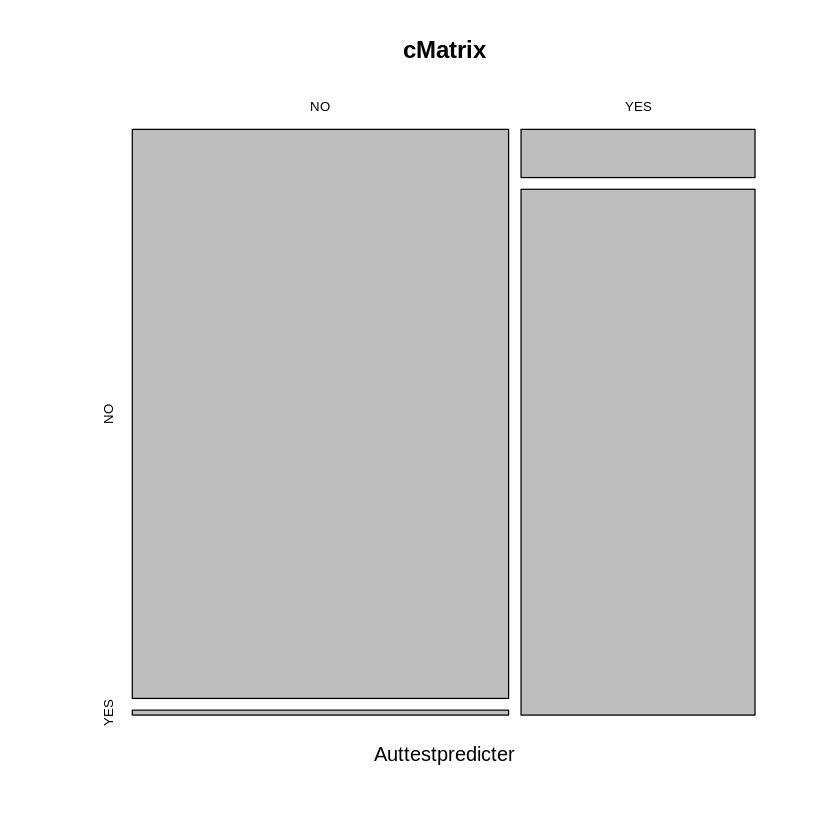

In [0]:
#----- Use Na?ve Bayes Model-----# 
        #build the classifiers
        Autclassifier<- naiveBayes(trainAut, trainAut$ClassASD)
        Autclassifier
        
        #evaluate model classfier
        Auttestpredicter <- predict(Autclassifier, testAut)
      
        #compare predictions to true values
        CrossTable(testAut$ClassASD, Auttestpredicter, prop.chisq = FALSE, prop.t = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
      
        #create confusion matrix
        cMatrix <- table(Auttestpredicter, testAut$ClassASD)
        plot(cMatrix)
        confusionMatrix(cMatrix)

#### Improve Model

In [0]:

        
        #build improved model
        Autclassifier2<- naiveBayes(trainAut, trainAut$ClassASD, laplace = 3)
        Autclassifier2
        
        #evaluate improved model
        Auttestpredicter2 <- predict(Autclassifier2, testAut)
        
        #compare improved predictions to true values
        CrossTable(testAut$ClassASD, Auttestpredicter2, prop.chisq = FALSE, prop.t = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = trainAut, y = trainAut$ClassASD, laplace = 3)

A-priori probabilities:
trainAut$ClassASD
       NO       YES 
0.6423659 0.3576341 

Conditional probabilities:
                 ClassASD
trainAut$ClassASD          NO         YES
              NO  0.993657505 0.006342495
              YES 0.011278195 0.988721805

                 f
trainAut$ClassASD      [,1]      [,2]
              NO  0.4304069 0.4956641
              YES 0.4692308 0.5000148

                 m
trainAut$ClassASD      [,1]      [,2]
              NO  0.5695931 0.4956641
              YES 0.5307692 0.5000148

                 JundiceN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8715203 0.3349820
              YES 0.8076923 0.3948736

                 JundiceY
trainAut$ClassASD      [,1]      [,2]
              NO  0.1284797 0.3349820
              YES 0.1923077 0.3948736

                 FamAutismN
trainAut$ClassASD      [,1]     


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       223 |        17 |       240 | 
                 |     0.929 |     0.071 |     0.643 | 
                 |     0.978 |     0.117 |           | 
-----------------|-----------|-----------|-----------|
             YES |         5 |       128 |       133 | 
                 |     0.038 |     0.962 |     0.357 | 
                 |     0.022 |     0.883 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       228 |       145 |       373 | 
                 |     0.611 |     0.389 |           | 
-----------------|-----------|-----------|-----------|

 


### Build k-NN Model
Next, I used the class package to apply the K-NN classification algorithm. The original unscaled version of the model I created only produced a 62.4% accuracy when tested. Like the Decision Tree Model, it has an issue with over reporting the “No-ASD” classification. I attempted to improve the model by rescaling using z-score standardization. This improved the accuracy slightly to 68.63%. The issue is still with the misclassification of the “Yes-ASD” outcome.

In [0]:
#----- Use k-NN Model-----# 
        #model training
        trainAutlabel <- trainAut[,1]
        testAutlabel <- testAut [,1]
        knnAutSpread <- knn(train=trainAut[,-1], testAut [,-1], cl=trainAutlabel, k=7)
        summary(knnAutSpread)
        CrossTable(x=testAutlabel, y=knnAutSpread, prop.chisq = FALSE)

NO YES 
305  68


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
             | knnAutSpread 
testAutlabel |        NO |       YES | Row Total | 
-------------|-----------|-----------|-----------|
          NO |       206 |        34 |       240 | 
             |     0.858 |     0.142 |     0.643 | 
             |     0.675 |     0.500 |           | 
             |     0.552 |     0.091 |           | 
-------------|-----------|-----------|-----------|
         YES |        99 |        34 |       133 | 
             |     0.744 |     0.256 |     0.357 | 
             |     0.325 |     0.500 |           | 
             |     0.265 |     0.091 |           | 
-------------|-----------|-----------|-----------|
Column Total |       305 |        68 |       373 | 
             |     0.818 |     0.182 |           | 
-------------|---

#### Improve Performance

In [0]:
      #improved performance using z-score standardization
        #new model training
        Total2z <- as.data.frame(scale(Total2[,-1]))
        Total2z_train <- Total2z[1:733,]
        Total2z_test <- Total2z[734:1100,]
        Total2z_train_label <- Total2[1:733,1]
        Total2z_test_label <- Total2[734:1100,1]
        
        #new performance
        knnAutPrediction <- knn(train=Total2z_train, Total2z_test, cl=Total2z_train_label, k=11)
        summary(knnAutPrediction)
        CrossTable(x=Total2z_test_label, y=knnAutPrediction, prop.chisq = FALSE)

NO YES 
332  35


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  367 

 
                   | knnAutPrediction 
Total2z_test_label |        NO |       YES | Row Total | 
-------------------|-----------|-----------|-----------|
                NO |       247 |        26 |       273 | 
                   |     0.905 |     0.095 |     0.744 | 
                   |     0.744 |     0.743 |           | 
                   |     0.673 |     0.071 |           | 
-------------------|-----------|-----------|-----------|
               YES |        85 |         9 |        94 | 
                   |     0.904 |     0.096 |     0.256 | 
                   |     0.256 |     0.257 |           | 
                   |     0.232 |     0.025 |           | 
-------------------|-----------|-----------|-----------|
      Column Total |       332 |       

### Build SVM Model
Lastly, I attempted classify using the kernlab package to use the SVM algorithm. When running the model using the vanilladot (basic linear) kernel, the model had a 65.68% accuracy in predicting the outcome. I attempted to improve the model’s performance by using the rbfdot (Radial basis/Gaussian), however this resulted in less accuracy (64.87%)

In [0]:
#----- Use SVM Model-----#      
        #build the model classifier
        ksvmmodelclassifier <- ksvm(ClassASD ~ ., data=trainAut, kernel ="vanilladot")
        ksvmmodelclassifier
        
        #evaluate performance
        ksmvmodelpredictions  <- predict(ksvmmodelclassifier, testAut)
        CrossTable(testAut$ClassASD, ksmvmodelpredictions, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual number', 'predicted number') )
        #model predicted 236 / 373 (63.27%)

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 505 

Objective Function Value : -482.1433 
Training error : 0.331499 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
              | predicted number 
actual number |        NO |       YES | Row Total | 
--------------|-----------|-----------|-----------|
           NO |       224 |        16 |       240 | 
              |     0.601 |     0.043 |           | 
--------------|-----------|-----------|-----------|
          YES |       114 |        19 |       133 | 
              |     0.306 |     0.051 |           | 
--------------|-----------|-----------|-----------|
 Column Total |       338 |        35 |       373 | 
--------------|-----------|-----------|-----------|

 


#### Improve Model

In [0]:
        #improved performance
        ksvmmodelclassifierrbf <- ksvm(ClassASD ~ ., data=trainAut, kernel ="rbfdot")
        ksvmmodelclassifierrbf
        ksmvmodelpredictionsrbf  <- predict(ksvmmodelclassifierrbf, testAut)
        CrossTable(testAut$ClassASD, ksmvmodelpredictionsrbf, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual number', 'predicted number') )
        #model predicted 247/ 373 (66.21%)

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0490338963559971 

Number of Support Vectors : 506 

Objective Function Value : -466.0458 
Training error : 0.290234 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
              | predicted number 
actual number |        NO |       YES | Row Total | 
--------------|-----------|-----------|-----------|
           NO |       210 |        30 |       240 | 
              |     0.563 |     0.080 |           | 
--------------|-----------|-----------|-----------|
          YES |        97 |        36 |       133 | 
              |     0.260 |     0.097 |           | 
--------------|-----------|-----------|-----------|
 Column Total |       307 |        66 |       373 | 
--------------|-----------|-----------|-----------|

 


## Results
I found the results very odd. It seems that when taking into account the AQ-10 responses and score, all the algorithms were able to classify. ASD outcome 100% of the time. When looking at all the behavioral factors, there was a steep decline in the accuracy, with the exception of Naïve Bayes.

![alt text](https://github.com/frnunez/MS-Portfolio-Syracuse-University/raw/master/IST%20707%20-%20Data%20Analytics%20-%20Classification%20of%20ASD%20Screening%20Data/asdresults.jpg)


## Conclusion
So how is this possible? Is the AQ-10 really that good of a predicter? Are there more factors at play than the variables in this data set? I looked up a few research articles, to see what information was available regarding the AQ tool.  A study in the Journal of Autism and Development Disorders concluded that there is little difference in results of the AQ-10 and AQ-50 and the AQ-10 can be a potentially useful screening tool (Booth, etal 2013). A later study in Psychological Medicine concluded that not were AQ scores not a significant predictor of diagnosis for ASD, but that the 64% of those who scored below the cut off and had a “No-ASD” outcome were actually false negatives who were later in fact diagnosed with ASD (Ashwood, etal, 2016). This led me to look at the provided data sets more. Upon further inspection, I noticed that the data was bias. All individuals with an AQ score of >=6 later received a No diagnosis. There were no signs of any false positives or negatives. This explains why there was a 100% accurate prediction when using using the AQ-10 responses and score. 
With regards to the other factors, I believe there are two issues at play. First there needs to be more data as there isn’t a variance in results. Second, since ASD is still being studied I believe that there are several other variables at play which aren’t included in this data set, and may prove as better predictors to classify ASD. I believe more data should be collected, including expanding the variables being recorded.
